# Quick Start Guide
This page contains details of how you can build a simple model using NeuralProphet with minimal features.

## Install
NeuralProphet can be installed with [pip](https://pypi.org/project/neuralprophet/):

    $ pip install neuralprophet

If you plan to use the package in a Jupyter notebook, we recommend to install the 'live' version. This will allow you to enable `progress='plot'` in the train function to get a live plot of train (and validation) loss.

    $ pip install neuralprophet[live]

Alternatively, you can get the most up to date version by cloning directly from `GitHub <https://github.com/ourownstory/neural_prophet>`_:

    $ git clone https://github.com/ourownstory/neural_prophet.git
    $ cd neural_prophet
    $ pip install .

### Import
Now you can use NeuralProphet in your code:

In [1]:
from neuralprophet import NeuralProphet

## Input Data

The input data format expected by the `neural_prophet` package is the same as in original 
`prophet`. It should have two columns, `ds` which has the timestamps and `y` column which
contains the observed values of the time series. Throughout this documentation, we 
will be using the time series data of the log daily page views for the [Peyton Manning](https://en.wikipedia.org/wiki/Peyton_Manning)
Wikipedia page. The data can be imported as follows.

In [2]:
import pandas as pd

data_location = "https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/"

df = pd.read_csv(data_location + "wp_log_peyton_manning.csv")
df.head()

ds       y
0  2007-12-10  9.5908
1  2007-12-11  8.5196
2  2007-12-12  8.1837
3  2007-12-13  8.0725
4  2007-12-14  7.8936

## First Model

A simple model with `neural_prophet` for this dataset can be fitted by creating
an object of the `NeuralProphet` class as follows and calling the fit function. This fits a model with the default settings in the model. Note that the frequency of data is set globally here. 
Valid timeseries frequency settings are [pandas timeseries offset aliases](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases).

In [3]:
m = NeuralProphet()
m.set_plotting_backend("plotly-static")  # show plots correctly in jupyter notebooks
metrics = m.fit(df)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 141
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (93) is too small than the required number for the learning rate finder (237). The results might not be optimal.


Finding best initial lr:   0%|          | 0/237 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Once the model is fitted, we can make predictions using the fitted model. 
Here we are predicting in-sample over our data to evaluate the model fit.
We could do the same for a holdout set.

In [ ]:
predicted = m.predict(df)
forecast = m.predict(df)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 93it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 93it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


## Plotting
With the forecasts obtained from the model, you can visualize them.

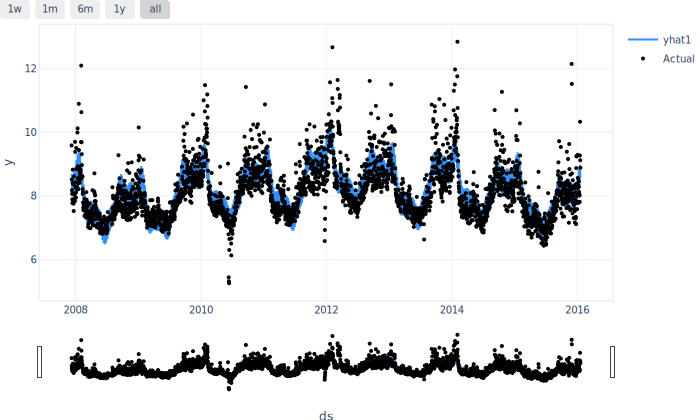

In [ ]:
m.plot(forecast)

This is a simple model with a trend, a weekly seasonality and a yearly seasonality estimated by default. 
You can also look at the individual components separately as below. 

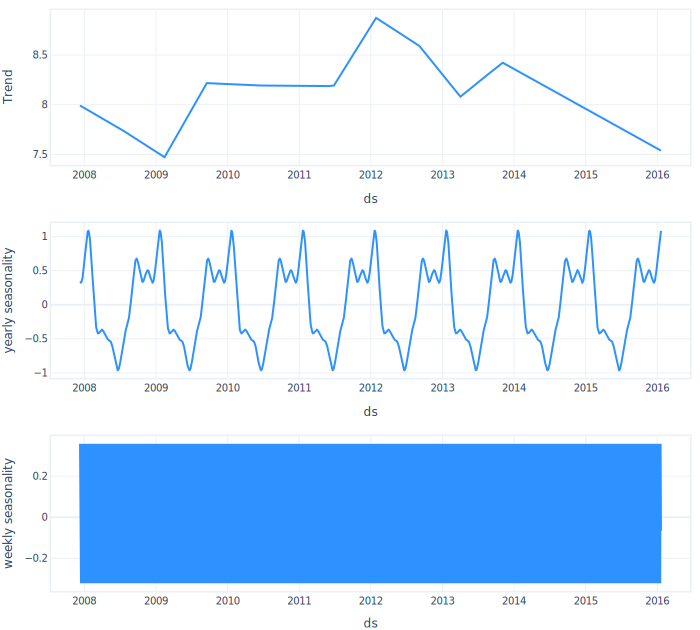

In [ ]:
m.plot_components(forecast)

The individual coefficient values can also be plotted as below to gain further insights.

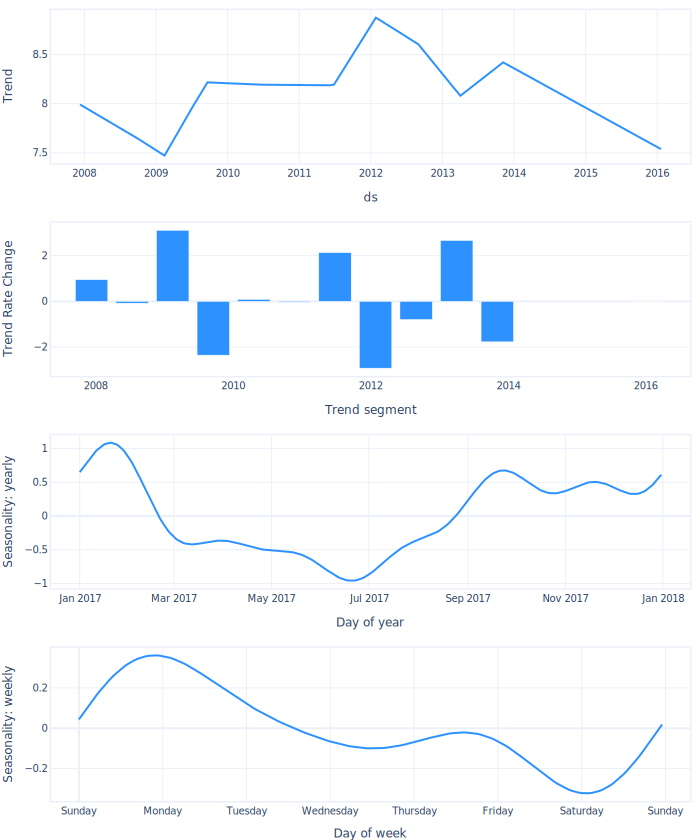

In [ ]:
m.plot_parameters()

## Improved model
The model can be improved by adding additional features such as auto-regression and uncertainty.

Here we add auto-regression terms and uncertainty to the model. The number of terms can be specified by the `n_lags` argument. Uncertainty intervals can be added by setting the `quantiles` argument.

In [ ]:
m = NeuralProphet(n_lags=10, quantiles=[0.05, 0.95])
m.set_plotting_backend("plotly-static")
metrics = m.fit(df)
forecast = m.predict(df)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 141
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (93) is too small than the required number for the learning rate finder (237). The results might not be optimal.


Finding best initial lr:   0%|          | 0/237 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 93it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


After specifiying tbe forecast step, we can plot the forecast.

In [ ]:
m.highlight_nth_step_ahead_of_each_forecast(1).plot(forecast)

Feel free to explore more features of NeuralProphet in our [tutorials](tutorials/index.rst) and [how-to-guides](how-to-guides/index.rst).